In [2]:
using LinearAlgebra
using PyPlot
using PyCall
using Random

# 1. Write the function sinkhorn for the Sinkhorn-Knopp algorithm

For convenience, let define the cost matrix first.

In [3]:
#cost function
function cost(x::AbstractVector,y::AbstractVector)
        x2 = x.^2
        y2 = y.^2
        cost = repeat(x2,outer=(1,length(y))) + repeat(y2',outer=(length(x),1)) - 2*x*y'
        return cost
end

cost (generic function with 1 method)

Write the sinkhorn function for Sinkhorn-Knopp algorithm

In [4]:
#sinkhorn-knopp algorithm for regularised OT
function sinkhorn(mu,nu,eps,kmax)
    global x,y
    Keps = exp.(-cost(x,y)/eps)
    n = length(mu)
    Dphi = ones(n)
    Dpsi = ones(n)
    for k = 1:kmax
        Dphi = mu./(Keps*Dpsi)
        Dpsi = nu./(Keps'*Dphi)
    end
    Gamma = Diagonal(Dphi)*Keps*Diagonal(Dpsi)
    return Dphi, Dpsi, Gamma
end

sinkhorn (generic function with 1 method)

# 2. Plot the optimal solution to problem $P_{\varepsilon}$ for different value of $\varepsilon$

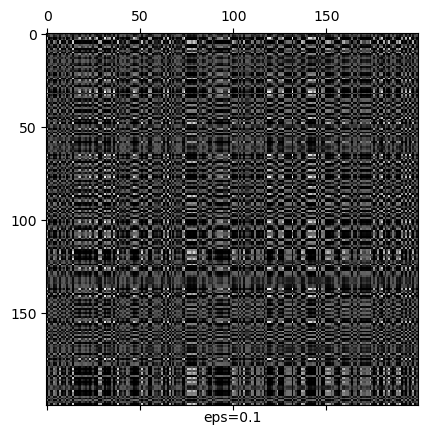

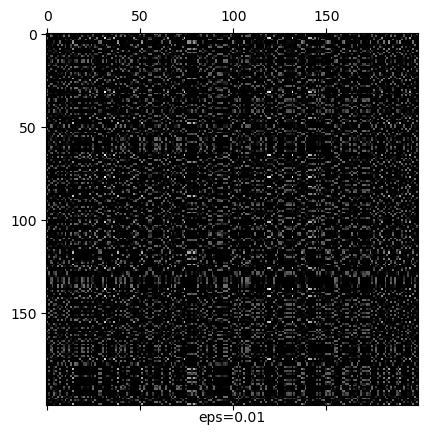

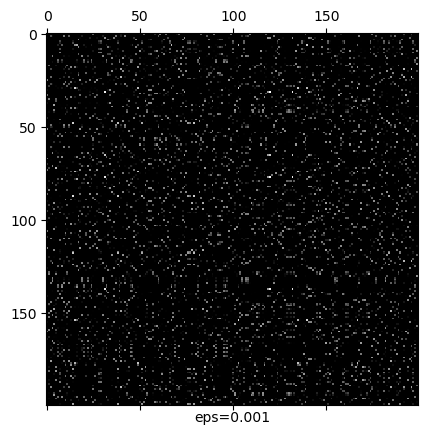

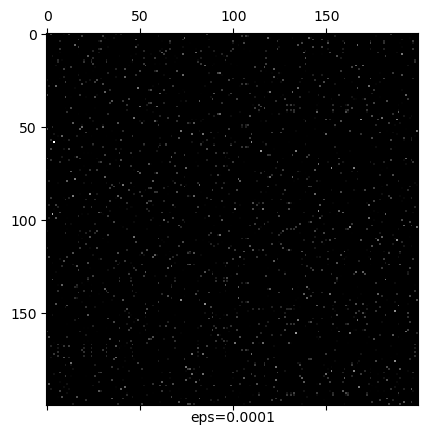

In [5]:
niter = 300
n = 200
Random.seed!(42)
x = rand(n)
y = rand(n)
μ = 1/n*ones(n)
Dphi, Dpsi, Gamma = sinkhorn(μ,μ,0.1,niter)
fig = figure(figsize=(3,3))
PyPlot.gray()
matshow(Gamma)
xlabel("eps=0.1")
savefig("eps=0.1.png")
close(fig)
Dphi, Dpsi, Gamma = sinkhorn(μ,μ,0.01,niter)
fig = figure(figsize=(3,3))
PyPlot.gray()
matshow(Gamma)
xlabel("eps=0.01")
savefig("eps=0.01.png")
close(fig)
Dphi, Dpsi, Gamma = sinkhorn(μ,μ,0.001,niter)
fig = figure(figsize=(3,3))
PyPlot.gray()
matshow(Gamma)
xlabel("eps=0.001")
savefig("eps=0.001.png")
close(fig)
Dphi, Dpsi, Gamma = sinkhorn(μ,μ,0.0001,niter)
fig = figure(figsize=(3,3))
PyPlot.gray()
matshow(Gamma)
xlabel("eps=0.0001")
savefig("eps=0.0001.png")
close(fig)

# 3. Modify the function sinkhorn to calculate the error $err1$

In [6]:
function sinkhorn_err(mu,nu,eps,kmax)
    global x,y
    Keps = exp.(-cost(x,y)/eps)
    n = length(mu)
    Dphi = ones(n)
    Dpsi = ones(n)
    err1 = []
    for k = 1:kmax
        Dphi = mu./(Keps*Dpsi)
        Dpsi = nu./(Keps'*Dphi)
        error = append!(err1,norm(Dphi.*(Keps*Dpsi)-mu))
    end
    Gamma = Diagonal(Dphi)*Keps*Diagonal(Dpsi)
    return Dphi, Dpsi, Gamma, err1
end

sinkhorn_err (generic function with 1 method)

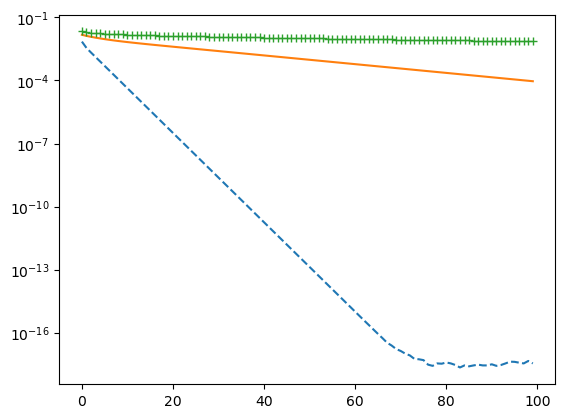

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000005190FC40>

In [7]:
n = 200
μ = 1/n*ones(n)
Dphi, Dpsi, Gamma, err1 = sinkhorn_err(μ,μ,0.1,100)
semilogy(err1,"--")
Dphi, Dpsi, Gamma, err2 = sinkhorn_err(μ,μ,0.01,100)
semilogy(err2,"-")
Dphi, Dpsi, Gamma, err3 = sinkhorn_err(μ,μ,0.001,100)
semilogy(err3,"+")

It can be seen that the algorithm tends to converge more slowly for smaller $\varepsilon$.

# 4. The function sinkhorn with a tolerance parameter

In [8]:
function sinkhorn_tol(mu,nu,eps,kmax,tol)
    global x,y
    Keps = exp.(-cost(x,y)/eps)
    n = length(mu)
    Dphi = ones(n)
    Dpsi = ones(n)
    error = tol + 1
    k = 0
    while error < tol
        k = k+1
        while k<kmax
            Dphi = mu./(Keps*Dpsi)
            Dpsi = nu./(Keps'*Dphi)
            error = norm(Dphi.*(Keps*Dpsi)-mu)
        end
    end
    Gamma = Diagonal(Dphi)*Keps*Diagonal(Dpsi)
    return Dphi, Dpsi, Gamma
end

sinkhorn_tol (generic function with 1 method)

# 5. Display the optimal transport between truncated Gaussian distributions

In [9]:
function gaussian(exp_val,s,t)
    gaussian = exp.(-(t.-exp_val).^2/(2*s^2))
end

gaussian (generic function with 1 method)

In [10]:
function normalize(v)
    return v/sum(v)
end

normalize (generic function with 1 method)

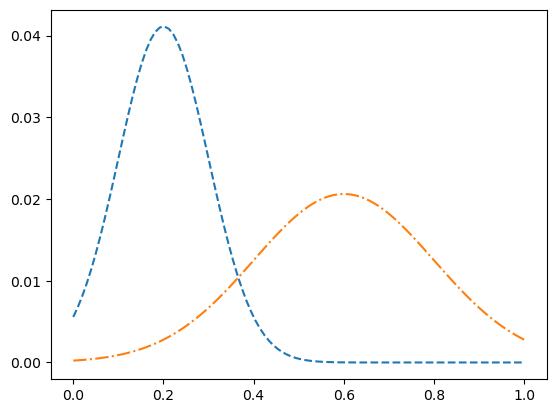

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000052FF80D0>

In [11]:
N = 100
t = LinRange(0,1,N)
mu = normalize(gaussian(0.2,0.1,t))
plot(t,mu,"--")
nu = normalize(gaussian(0.6,0.2,t))
plot(t,nu,"-.")

In [12]:
function gaussian_ot()
    global x,y
    niter = 500
    eps = 0.001
    x = LinRange(0,1,N)
    y = LinRange(0,1,N)
    Keps = exp.(-cost(x,y)/eps)
    Dphi, Dpsi, Gamma = sinkhorn(mu,nu,eps,niter)
    imshow(Gamma)
    T = Keps*(Dpsi.*x).*Dphi./mu
    plot(T*N,x*N,"C6-")
end

gaussian_ot (generic function with 1 method)

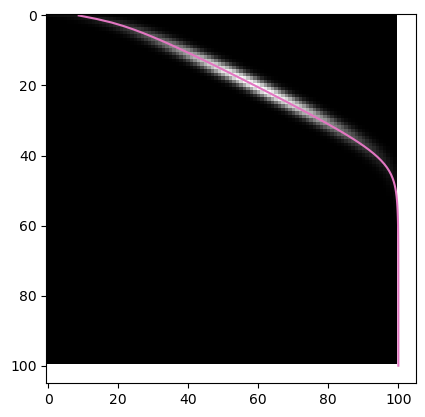

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000053036DF0>

In [13]:
gaussian_ot()